In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
os.chdir('C:\\Users\\Vidhya\\Documents\\Python\\Desktop\\Edubridge\\Python\\Datasets')

In [3]:
data=pd.read_csv('loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
data.shape

(45000, 14)

In [5]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [7]:
data.describe(include='all')

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000,45000,4.500000e+04,45000.000000,45000,45000.000000,45000,45000.000000,45000.000000,45000.000000,45000.000000,45000,45000.000000
unique,NaN,2,5,NaN,NaN,4,NaN,6,NaN,NaN,NaN,NaN,2,NaN
top,NaN,male,Bachelor,NaN,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,NaN,Yes,NaN
freq,NaN,24841,13399,NaN,NaN,23443,NaN,9153,NaN,NaN,NaN,NaN,22858,NaN
mean,27.764178,NaN,NaN,8.031905e+04,5.410333,NaN,9583.157556,NaN,11.006606,0.139725,5.867489,632.608756,NaN,0.222222
std,6.045108,NaN,NaN,8.042250e+04,6.063532,NaN,6314.886691,NaN,2.978808,0.087212,3.879702,50.435865,NaN,0.415744
min,20.000000,NaN,NaN,8.000000e+03,0.000000,NaN,500.000000,NaN,5.420000,0.000000,2.000000,390.000000,NaN,0.000000
25%,24.000000,NaN,NaN,4.720400e+04,1.000000,NaN,5000.000000,NaN,8.590000,0.070000,3.000000,601.000000,NaN,0.000000
50%,26.000000,NaN,NaN,6.704800e+04,4.000000,NaN,8000.000000,NaN,11.010000,0.120000,4.000000,640.000000,NaN,0.000000
75%,30.000000,NaN,NaN,9.578925e+04,8.000000,NaN,12237.250000,NaN,12.990000,0.190000,8.000000,670.000000,NaN,0.000000


In [8]:
data.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

# EDA

In [9]:
data.person_gender.value_counts()

male      24841
female    20159
Name: person_gender, dtype: int64

In [10]:
data.person_education.value_counts()

Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: person_education, dtype: int64

In [11]:
data.person_home_ownership.value_counts()

RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: person_home_ownership, dtype: int64

In [12]:
data.loan_intent.value_counts()

EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: loan_intent, dtype: int64

In [13]:
data.previous_loan_defaults_on_file.value_counts()

Yes    22858
No     22142
Name: previous_loan_defaults_on_file, dtype: int64

In [14]:
data.loan_status.value_counts()

0    35000
1    10000
Name: loan_status, dtype: int64

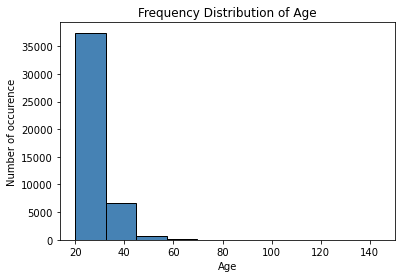

In [15]:
plt.hist(data['person_age'],color='steelblue',edgecolor='black')
plt.title('Frequency Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of occurence')
plt.show()

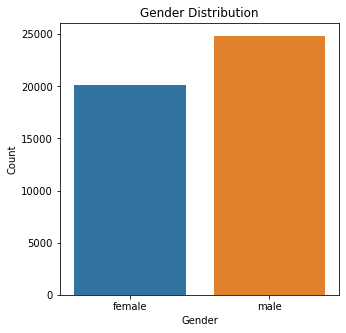

In [16]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='person_gender',data=data)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

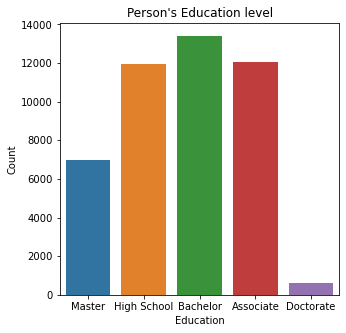

In [17]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='person_education',data=data)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title("Person's Education level")
plt.show()

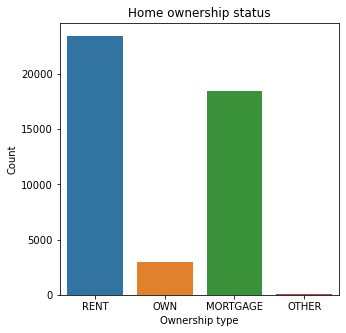

In [18]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='person_home_ownership',data=data)
plt.xlabel('Ownership type')
plt.ylabel('Count')
plt.title('Home ownership status')
plt.show()

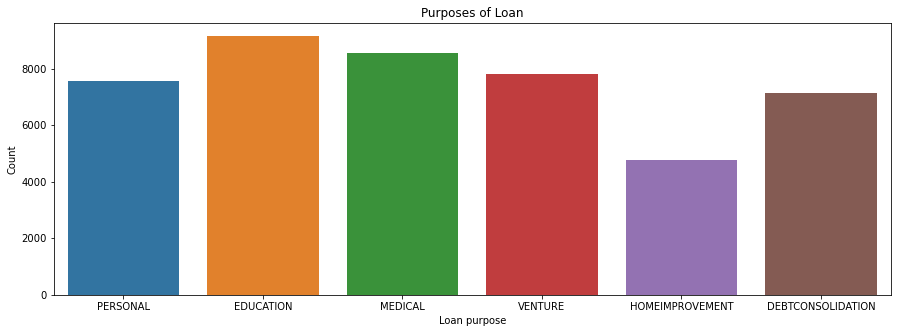

In [19]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x='loan_intent',data=data)
plt.xlabel('Loan purpose')
plt.ylabel('Count')
plt.title('Purposes of Loan')
plt.show()

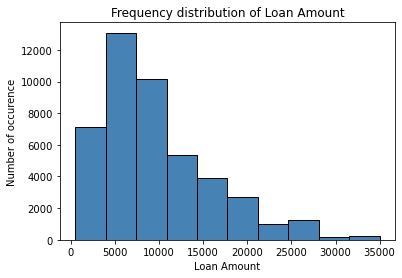

In [20]:
plt.hist(data.loan_amnt,color='steelblue',edgecolor='black')
plt.title('Frequency distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Number of occurence')
plt.show()

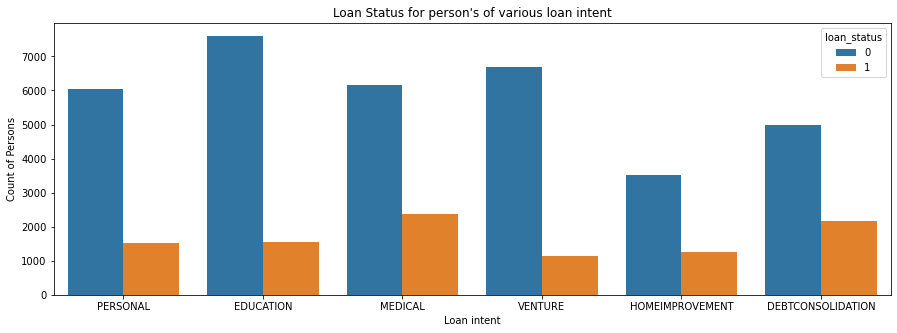

In [21]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x='loan_intent',hue='loan_status',data=data)
plt.xlabel('Loan intent')
plt.ylabel('Count of Persons')
plt.title("Loan Status for person's of various loan intent")
plt.show()

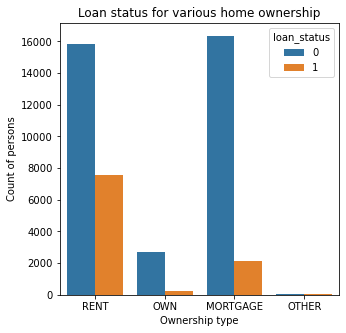

In [22]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='person_home_ownership',hue='loan_status',data=data)
plt.xlabel('Ownership type')
plt.ylabel('Count of persons')
plt.title('Loan status for various home ownership')
plt.show()

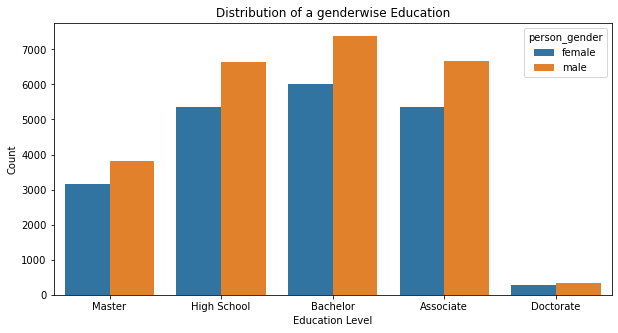

In [23]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='person_education',hue='person_gender',data=data)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title("Distribution of a genderwise Education")
plt.show()

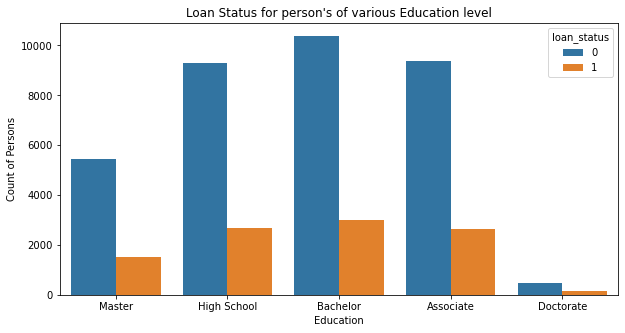

In [24]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='person_education',hue='loan_status',data=data)
plt.xlabel('Education')
plt.ylabel('Count of Persons')
plt.title("Loan Status for person's of various Education level")
plt.show()

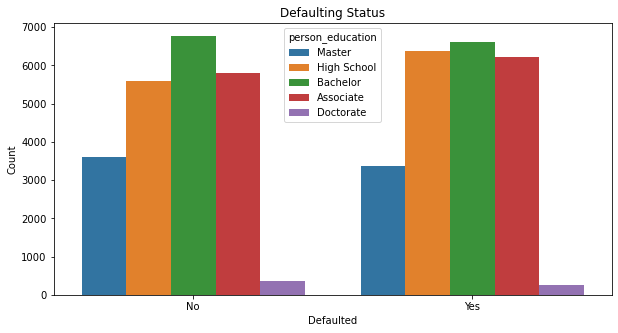

In [25]:
fig=plt.figure(figsize=(10,5))
sns.countplot(x='previous_loan_defaults_on_file',hue='person_education',data=data)
plt.xlabel('Defaulted')
plt.ylabel('Count')
plt.title('Defaulting Status')
plt.show()

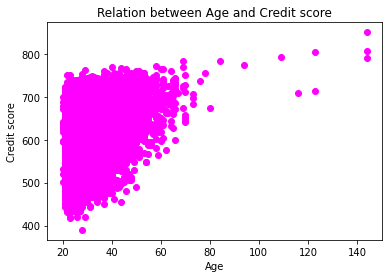

In [26]:
plt.scatter(data.person_age,data.credit_score,color='magenta')
plt.xlabel('Age')
plt.ylabel('Credit score')
plt.title('Relation between Age and Credit score')
plt.show()

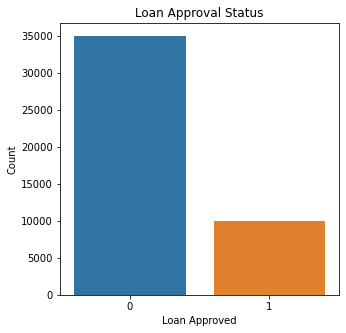

In [27]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='loan_status',data=data)
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.title('Loan Approval Status')
plt.show()

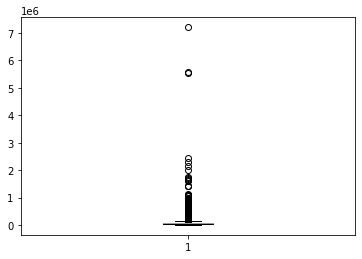

In [28]:
plt.boxplot(data.person_income)
plt.show()

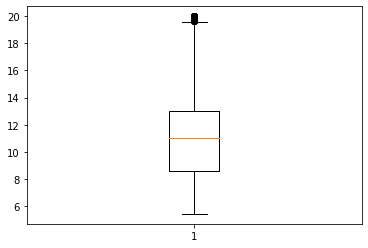

In [29]:
plt.boxplot(data.loan_int_rate)
plt.show()

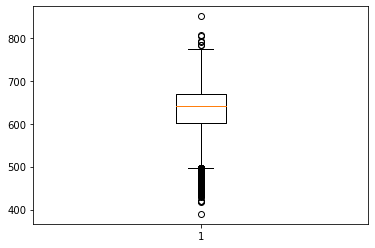

In [30]:
plt.boxplot(data.credit_score)
plt.show()

# ML algorithms

In [31]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [32]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
data.person_gender=encode.fit_transform(data.person_gender)
data.person_education=encode.fit_transform(data.person_education)
data.person_home_ownership=encode.fit_transform(data.person_home_ownership)
data.loan_intent=encode.fit_transform(data.loan_intent)
data.previous_loan_defaults_on_file=encode.fit_transform(data.previous_loan_defaults_on_file)

In [33]:
data

#person_age (0-female, 1-male)
#person_education (0-Associate, 1-Bachelor, 2-Doctorate, 3-High School, 4-Master)
#person_home_ownership (0-Mortgage, 1-Other, 2-Own, 3-Rent)
#loan_intent (0-Debt Consolidation, 1-Education, 2-Home Improvement, 3-Medical, 4-Personal, 5-Venture)
#previous_loan_defaults_on_file (0-No, 1-Yes)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


# Splitting data into Train and Test model

In [34]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [37]:
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [38]:
accuracies=[]

In [39]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print('The accuracy of Logistic Regression is', accuracy_score(y_test,y_predict)*100)
accuracies.append(accuracy_score(y_test,y_predict)*100)

The accuracy of Logistic Regression is 82.08888888888889


In [40]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
depth=[1,2,3,4,5,6,7,8,9,10,11,12]
accuracies1=[]
for i in depth:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    accuracies1.append(accuracy_score(y_test,y_predict)*100)
    
for i in range(len(depth)):
    print('Accuracy of decision Tree with depth',depth[i],'is',accuracies1[i])

Accuracy of decision Tree with depth 1 is 77.34444444444445
Accuracy of decision Tree with depth 2 is 85.08888888888889
Accuracy of decision Tree with depth 3 is 89.45555555555555
Accuracy of decision Tree with depth 4 is 90.75555555555556
Accuracy of decision Tree with depth 5 is 90.65555555555555
Accuracy of decision Tree with depth 6 is 90.96666666666667
Accuracy of decision Tree with depth 7 is 91.02222222222223
Accuracy of decision Tree with depth 8 is 91.43333333333334
Accuracy of decision Tree with depth 9 is 91.35555555555555
Accuracy of decision Tree with depth 10 is 91.34444444444443
Accuracy of decision Tree with depth 11 is 91.4
Accuracy of decision Tree with depth 12 is 91.45555555555556


In [41]:
print(max(accuracies1))
accuracies.append(max(accuracies1))

91.45555555555556


In [42]:
#KNN Algorithm

from sklearn.neighbors import KNeighborsClassifier
neighbors=[1,2,3,4,5,6,7,8,9,10]
accuracies2=[]
for i in neighbors:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    accuracies2.append(accuracy_score(y_test,y_predict)*100)
    
for i in range(len(neighbors)):
    print('Accuracy of KNN with depth',depth[i],'is',accuracies2[i])

Accuracy of KNN with depth 1 is 79.66666666666666
Accuracy of KNN with depth 2 is 82.93333333333334
Accuracy of KNN with depth 3 is 82.35555555555555
Accuracy of KNN with depth 4 is 83.5
Accuracy of KNN with depth 5 is 83.56666666666666
Accuracy of KNN with depth 6 is 83.9888888888889
Accuracy of KNN with depth 7 is 83.93333333333334
Accuracy of KNN with depth 8 is 83.87777777777778
Accuracy of KNN with depth 9 is 83.77777777777777
Accuracy of KNN with depth 10 is 83.58888888888889


In [43]:
print(max(accuracies2))
accuracies.append(max(accuracies2))

83.9888888888889


In [44]:
#Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print('The accuracy of Naive Bayes is', accuracy_score(y_test,y_predict)*100)
accuracies.append(accuracy_score(y_test,y_predict)*100)

The accuracy of Naive Bayes is 81.62222222222222


In [45]:
accuracies

[82.08888888888889, 91.45555555555556, 83.9888888888889, 81.62222222222222]

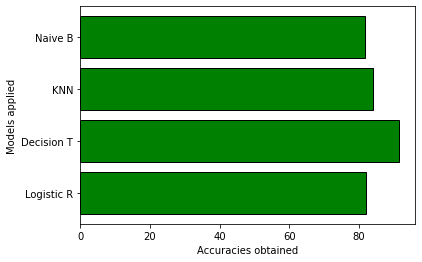

In [46]:
models=['Logistic R','Decision T', 'KNN', 'Naive B']
plt.barh(models,accuracies,color='green',edgecolor='black')
plt.ylabel('Models applied')
plt.xlabel('Accuracies obtained')
plt.show()